# Import libraries and data

In [ ]:
!pip install pandas
!pip install wordcloud
!pip install nltk
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install sklearn
!pip install gensim
!pip install pyldavis
!pip install textblob
!pip install spacy
!pip install textstat

In [1]:
import pandas as pd
import nltk
import numpy as np

In [2]:
#adata = airplan data
adata= pd.read_csv('/airline_reviews/AirlineReviews.csv')
adata.head(3)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf


# Data preprocessing

In [3]:
#finding null values
df = pd.DataFrame(adata)

df.isnull()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
4,True,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129450,True,False,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,True,False,False,False
129451,True,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
129452,True,False,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,True,False,False,False
129453,True,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False


In [ ]:
#null value in %
nan_count = df.isnull().sum() * 100 / len(df)
print(nan_count)

Aircraft               71.863582
AirlineName             0.000000
CabinType               2.331312
DateFlown              29.710710
DatePub                 0.000000
EntertainmentRating     0.000000
FoodRating              0.000000
GroundServiceRating     0.000000
OriginCountry           1.296203
OverallScore            3.345564
Recommended             0.000000
Review                  0.636515
Route                  29.840485
SeatComfortRating       0.000000
ServiceRating           0.000000
Slug                    0.000000
Title                   0.003090
TravelType             29.592522
TripVerified           54.031903
ValueRating             0.000000
WifiRating              0.000000
unique_id               0.000000
dtype: float64


In [4]:
#way too many values lost in Aircraft and TripVerified so they will be detelted
#uniqe_id is not neccsery so it will also be deleted
#padata = processed airplan data
df = pd.DataFrame(adata)
padata=df.drop(['Aircraft', 'TripVerified', 'unique_id'], axis=1)

In [5]:
padata.head(3)

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,ValueRating,WifiRating
0,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,yes,Moroni to Moheli. Turned out to be a pretty de...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,3,0
1,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,Moroni to Anjouan. It is a very small airline....,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,2,0
2,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,Anjouan to Dzaoudzi. A very small airline and ...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,2,0


In [ ]:
#the data we will be working on 'Recommended', 'Review' so will take out null values from them


In [6]:
pdata_RR = padata[['Recommended', 'Review']]

In [7]:
#we don't need rows without reviews so we will drop them
pdata_RR = pdata_RR.dropna()
pdata_RR.head(3)


,Recommended,Review
0,yes,Moroni to Moheli. Turned out to be a pretty de...
1,no,Moroni to Anjouan. It is a very small airline....
2,no,Anjouan to Dzaoudzi. A very small airline and ...


In [8]:
nc = pdata_RR.isnull().sum() * 100 / len(pdata_RR)
print(nc)

Recommended    0.0
Review         0.0
dtype: float64


In [9]:
#convert the raw text into vectors
pdata_RR.dtypes

Recommended    object
Review         object
dtype: object

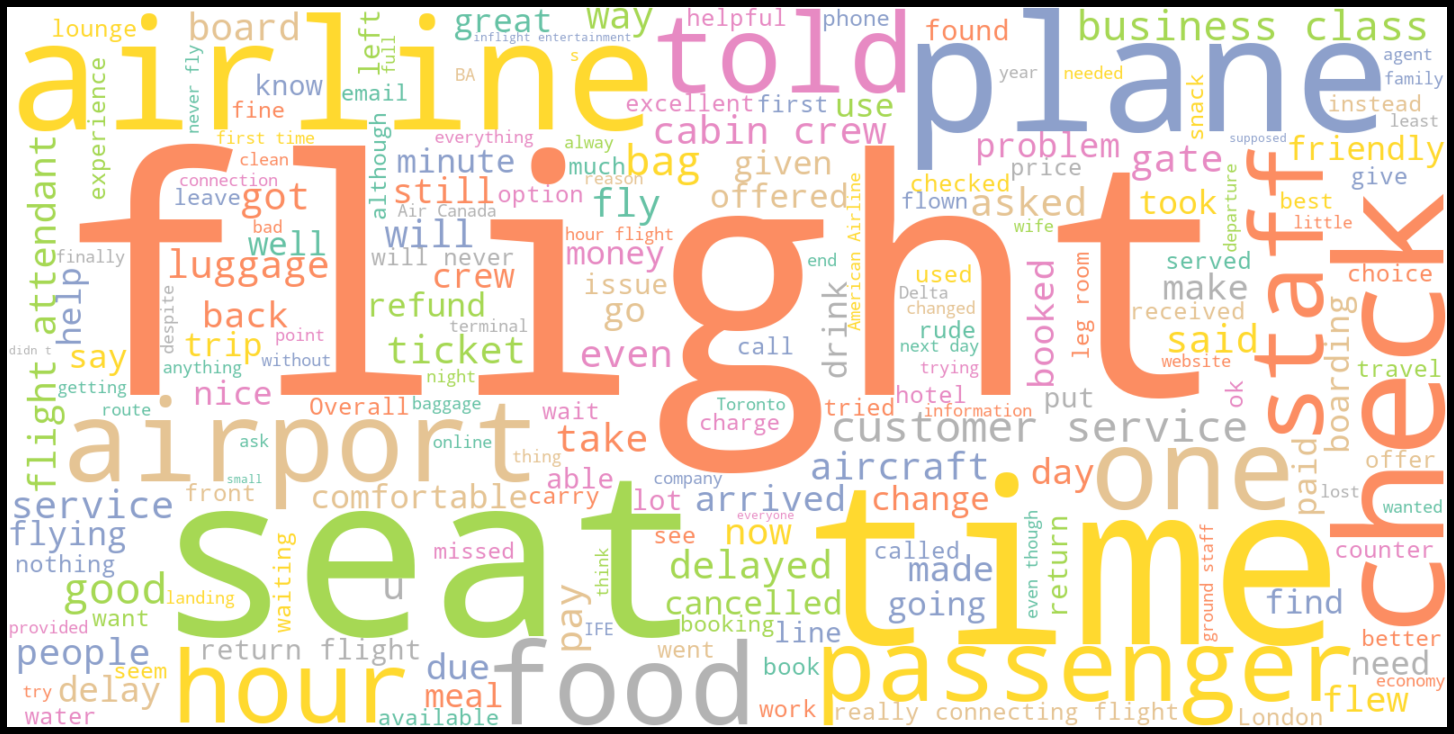

In [ ]:
#make a word cloud to see the most used words
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import pandas as pd
import matplotlib.pylab as plt
from PIL import Image
import numpy as np

stopwords = set(STOPWORDS)
data_file = pdata_RR
wordcloud = WordCloud(stopwords = stopwords , width=1600 , height=800,background_color="White",colormap="Set2").generate(''.join(data_file['Review']))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)

plt.show()

In [10]:

pdata_RR
pdata_RR2 = pdata_RR

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def text_to_vector(text):

    text = re.sub(r'[^\w\s]', '', text)  # cleaning
    words = nltk.word_tokenize(text)  # tokenization
    words = [w for w in words if not w in stop_words]
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

def convert_columns_to_vectors(df):

    for column in df.columns:
        if isinstance(df[column][0], str):
            df[column] = df[column].apply(text_to_vector)
    return df

df = convert_columns_to_vectors(pdata_RR2[['Review']].copy())
df


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [13]:
tpdata_RR = pdata_RR
tpdata_RR['REC'] = pdata_RR['Recommended'].apply(lambda x: 0 if x == "yes" else 1)
tpdata_RR.drop("Recommended", axis=1)

,Review,REC
0,Moroni to Moheli. Turned out to be a pretty de...,0
1,Moroni to Anjouan. It is a very small airline....,1
2,Anjouan to Dzaoudzi. A very small airline and ...,1
3,Havana - Cayo Coco return. A one hour flight w...,0
4,Holguin to Havana last week. Okay apart from i...,1
...,...,...
129450,This airline is terrible! Timetable changes (m...,1
129451,We often fly with Wizzair to/from Charleroi/Bu...,0
129452,Avoid Wizzair! A group of us had our outgoing ...,1
129453,PRG-LTN and LTN-PRG were rather good flights. ...,0


In [14]:
X, y = tpdata_RR["Review"], tpdata_RR["REC"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
X_train

51991     Manado to Kakarta. The flight was really smoot...
90265     ✅ , | Superb flying experience on Qatar Airway...
51496     San Diego to Honolulu. We boarded the plane on...
126358    Orlando to Portland with United Airlines, the ...
82448     I had the misfortune of being booked on a Phil...
                                ...                        
39691     Guangzhou to Sydney on 2nd January and the cab...
49848     ✅ , |  Colombo to Dubai. I was very happy with...
92054     BCN-DOH-DXB. A good flight but nothing impress...
110800    Booked Tiger BNE-SYD and back during this East...
93730     Impeccable service, just be aware of the timin...
Name: Review, Length: 102904, dtype: object

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [39]:
#svm train
clf = LinearSVC()
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [18]:
clf.score(X_test_vectorized, y_test)

0.9124655031678781

In [40]:
y_pred = clf.predict(X_test_vectorized)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9124655031678781


In [27]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.9312141740489839


In [28]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.9227988639297702


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 9179  1196]
 [ 1056 14296]]


In [ ]:
y_pred = clf.predict(X_test_vectorized)
y_predl = y_pred.tolist()
y_predl = np.reshape(y_predl, (-1, 1))
print(clf.score(y_predl, y_test))

In [ ]:
# 0 = no | 1 = yes
Rev = ['worst time of my life', 'it was great',"the flight crew was very nice","everyone was rude to me"]
Rev_count = vectorizer.transform(Rev)
clf.predict(Rev_count)

array([1, 0, 0, 1])

In [30]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized,y_train)

MultinomialNB()

In [31]:
model.score(X_test_vectorized, y_test)

0.8595250126326428

In [ ]:
# 0 = no | 1 = yes
Rev2 = ['worst time of my life', 'it was great',"the flight crew was very nice","everyone was rude to me"]
Rev_count2 = vectorizer.transform(Rev2)
model.predict(Rev_count2)

array([1, 0, 0, 1])

In [33]:
y_pred2 = model.predict(X_test_vectorized)

In [34]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8595250126326428


In [35]:
recall = recall_score(y_test, y_pred2)
print(f"Recall: {recall}")

Recall: 0.8875716519020324


In [36]:
precision = precision_score(y_test, y_pred2)
print(f"Precision: {precision}")

Precision: 0.8783034678355034


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8487  1888]
 [ 1726 13626]]
